In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [91]:
#データの読み込み
df_project = pd.read_csv("ks-projects-201801.csv")

display(df_project.head())


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [92]:
#統計値の表示
df_project.describe() 

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [93]:
#欠損値の確認
display(df_project.isnull().sum())
#nameとuse pledgedに欠損値があることを確認。

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [94]:
#欠損値のある行を削除
df_project = df_project.dropna(how='any')

#再度欠損値の確認
display(df_project.isnull().sum())

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [129]:
#データの件数をチェック
display(df_project.count())


ID                  331462
name                331462
category            331462
main_category       331462
currency            331462
deadline            331462
goal                331462
launched            331462
pledged             331462
state               331462
backers             331462
country             331462
usd pledged         331462
usd_pledged_real    331462
usd_goal_real       331462
successful_x        331462
Academic_x          331462
Accessories_x       331462
Action_x            331462
Animals_x           331462
Animation_x         331462
Anthologies_x       331462
Apparel_x           331462
Apps_x              331462
Architecture_x      331462
Art_x               331462
Art Books_x         331462
Audio_x             331462
Bacon_x             331462
Blues_x             331462
                     ...  
Food                331462
Games               331462
Journalism          331462
Music               331462
Photography         331462
Publishing          331462
T

In [95]:
#データ形式を確認
display(df_project.dtypes)
#あとでダミー変数にするものを決めるため。objectのものは要検討。

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [117]:
#成功したものを抽出①
#df_project_success = df_project[df_project['state']=='successful']
#失敗したものを抽出②
#df_project_failed =  df_project[df_project['state']=='failed']
#①と②の列を合体
#df_project = pd.concat([df_project_success,df_project_failed])

#print(df_project)

In [111]:
#カテゴリ変数をget_dummiesを利用してダミー変数に置き換える
a_dummy = pd.get_dummies(df_project["category"], drop_first=True)
b_dummy = pd.get_dummies(df_project["main_category"], drop_first=True)
c_dummy = pd.get_dummies(df_project["state"], drop_first=True)
d_dummy = pd.get_dummies(df_project["country"], drop_first=True)


print(c_dummy)

        successful
5                1
6                1
11               1
14               1
18               1
20               1
24               1
25               1
27               1
28               1
29               1
31               1
32               1
34               1
36               1
37               1
39               1
41               1
42               1
44               1
46               1
47               1
48               1
50               1
53               1
54               1
57               1
59               1
63               1
66               1
...            ...
378603           0
378605           0
378606           0
378607           0
378608           0
378611           0
378615           0
378616           0
378618           0
378619           0
378620           0
378627           0
378628           0
378629           0
378632           0
378633           0
378634           0
378635           0
378638           0
378641           0
378645      

In [112]:
#ダミー変数に変換したカテゴリを列に追加する
df_project = pd.merge(df_project, a_dummy, left_index=True, right_index=True)
df_project = pd.merge(df_project, b_dummy, left_index=True, right_index=True)
df_project = pd.merge(df_project, c_dummy, left_index=True, right_index=True)
df_project = pd.merge(df_project, d_dummy, left_index=True, right_index=True)

#分析において不要な項目を削除しておく


display(df_project.head())


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,IT_y,JP_y,LU_y,MX_y,NL_y,NO_y,NZ_y,SE_y,SG_y,US_y
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,0,0,0,0,0,0,0,0,0,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,...,0,0,0,0,0,0,0,0,0,1
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,...,0,0,0,0,0,0,0,0,0,1
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,...,0,0,0,0,0,0,0,0,0,0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,...,0,0,0,0,0,0,0,0,0,1


In [118]:
#成功と、失敗でデータを分ける。
#df_project_S = df_project[df_project['state']==1]
#df_project_F = df_project[df_project['state']==0]

#成功したものを抽出①
df_project_success = df_project[df_project['state']=='successful']
#失敗したものを抽出②
df_project_failed =  df_project[df_project['state']=='failed']
#①と②の列を合体
df_project = pd.concat([df_project_success,df_project_failed])

print(df_project)


                ID                                               name  \
5       1000014025                               Monarch Espresso Bar   
6       1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
11       100005484                                   Lisa Lim New CD!   
14      1000057089  Tombstone: Old West tabletop game and miniatur...   
18      1000070642                Mike Corey's Darkness & Light Album   
20      1000072011              CMUK. Shoes: Take on Life Feet First.   
24      1000091520                        The Book Zoo - A Mini-Comic   
25      1000102741  Matt Cavenaugh & Jenny Powers make their 1st a...   
27      1000104688                                Permaculture Skills   
28      1000104953  Rebel Army Origins: The Heroic Story Of Major ...   
29       100011318                      My Moon - Animated Short Film   
31      1000117861                  Ledr workbook: one tough journal!   
32      1000120151            Feather Cast Furled F

In [131]:
#利用する説明変数を検討。（本当は散布図や相関係数で確認したいが、技量がないため、名称等から判断。涙）
#ダミー変数に置きかえたものをどう扱っていいかわからない・・・グラフが書けない・・・
#ID,name,main_category（細かすぎる）,currency,deadline,launched は利用しなさそう。
#usd pledged、usd_pledged_realはproject後の情報になるので、使えない。

#今回は、goalとbackersを利用して分析をしてみることにする。

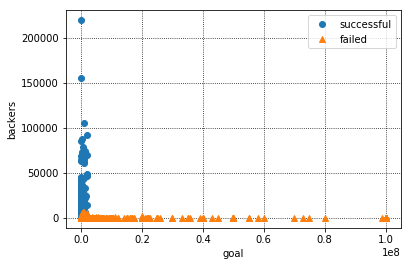

In [130]:
#データをプロットしてグラフを書いてみる

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_project_success["goal"],df_project_success["backers"], 'o', color='C0', label='successful')
plt.plot(df_project_failed["goal"],df_project_failed["backers"], '^', color='C1', label='failed')
plt.legend(loc='best')


plt.xlabel("goal")
plt.ylabel("backers")
plt.show()

#うーん。なんかいまいちなグラフな感じがするが・・・


In [135]:
# 説明変数を2つに絞って，ロジスティック回帰(log),max_iter
y = df_project["successful"].values
X = df_project[["backers", "goal"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = 29163.343, w1 = 8724365.177, w2 = -34904.145


MemoryError: 

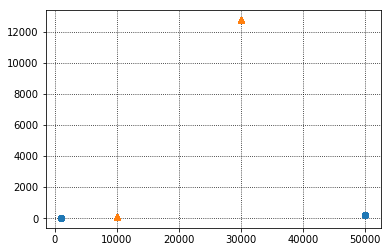

In [140]:
x1, x2 = df_project["goal"].values, df_project["backers"].values 

# データをプロット
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

plt.plot(x1[y], x2[y], 'o', color='C0', label='successful')
plt.plot(x1[~y], x2[~y], '^', color='C1', label='false')

# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')

plt.xlabel("goal")
plt.ylabel("backers")
plt.show()

In [138]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -3.963
正答率 = 88.525%


In [139]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = successful', '正解 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
conf_mat

,予測 = successful,予測 = failed
正解 = successful,164525,33086
正解 = failed,4950,128901
